In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import os
from tensorflow.keras.optimizers import RMSprop,Adam

In [2]:
TRAINING_APPLE_BRAEBURN = os.path.join("../fruits-360/Training/Banana")
# TESTING_DATASET = os.path.join("fruits-360/Test")
apple_files=os.listdir(TRAINING_APPLE_BRAEBURN)


# Check if files are completely loaded

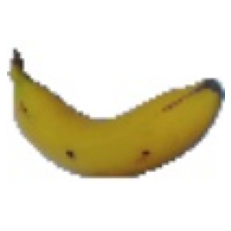

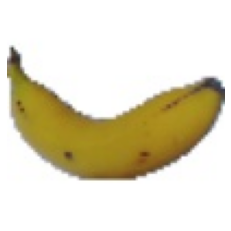

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 20

next_apple_braeburn = [os.path.join(TRAINING_APPLE_BRAEBURN, fname) 
                for fname in apple_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_apple_braeburn):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
split_data = 0.2
Training_directory=os.path.join("../fruits-360/Training")

Testing_directory=os.path.join("../fruits-360/Test")


# USing image augmentation
training_datagen = ImageDataGenerator(
                    rescale = 1./255.,
                    rotation_range = 30,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    vertical_flip = True,
                    fill_mode = 'nearest'
)

testing_datagen = ImageDataGenerator(rescale = 1./255.)

training_data = training_datagen.flow_from_directory(
                    Training_directory,
                    target_size = (32,32), 
                    batch_size = 16,
                    class_mode = 'categorical'
)

testing_data = testing_datagen.flow_from_directory(
                    Testing_directory,
                    target_size = (32,32),
                    batch_size = 16,
                    class_mode = 'categorical',
                    shuffle=False
)
batch_size = 16
training_step = len(training_data)*batch_size
testing_step = len(testing_data)*batch_size
print(testing_step)
print(training_step)


Found 20466 images belonging to 40 classes.
Found 6875 images belonging to 40 classes.
6880
20480


In [7]:
import numpy as np
#train_images_iter.classes contains a list of classes of each image
unique, counts = np.unique(training_data.classes, return_counts=True)
print ("Different number of classes and their values")
dict(zip(training_data.class_indices, counts))

Different number of classes and their values


{'Apple Braeburn': 492,
 'Apricot': 492,
 'Avocado': 427,
 'Banana': 490,
 'Beetroot': 450,
 'Blueberry': 462,
 'Cactus fruit': 490,
 'Cantaloupe 1': 492,
 'Carambula': 490,
 'Cauliflower': 702,
 'Cherry 1': 492,
 'Chestnut': 450,
 'Clementine': 490,
 'Cocos': 490,
 'Dates': 490,
 'Grape Blue': 984,
 'Guava': 490,
 'Hazelnut': 464,
 'Kiwi': 466,
 'Lemon': 492,
 'Limes': 490,
 'Lychee': 490,
 'Mango': 490,
 'Onion Red': 450,
 'Orange': 479,
 'Papaya': 492,
 'Peach': 492,
 'Pear': 492,
 'Pepino': 490,
 'Physalis': 492,
 'Pineapple': 490,
 'Pitahaya Red': 490,
 'Plum': 447,
 'Pomegranate': 492,
 'Potato Red': 450,
 'Raspberry': 490,
 'Strawberry': 492,
 'Tangelo': 490,
 'Tomato 1': 738,
 'Walnut': 735}

In [8]:
class_labels = testing_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [9]:
labels=os.listdir(Training_directory)
number_classes = len(labels)
print(number_classes)
print(len(Training_directory))

class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        accuracy = logs['acc']
        if (accuracy >= 0.99):
            print("\n Finished because accuracy is greater than 95")
            self.model.stop_training=True


callback = MyCallBack()

40
22


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same",input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(number_classes,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [9]:

history = model.fit_generator(
    training_data,
    steps_per_epoch =  nb_train_samples // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps = nb_validation_samples // batch_size,
callbacks=[callback])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1279/1279 [==============================] - 1375s 1s/step - loss: 0.7705 - acc: 0.7533 - val_loss: 0.3098 - val_acc: 0.9001
Epoch 2/10
1279/1279 [==============================] - 788s 616ms/step - loss: 0.2882 - acc: 0.9092 - val_loss: 0.1575 - val_acc: 0.9448
Epoch 3/10
1279/1279 [==============================] - 99s 77ms/step - loss: 0.2316 - acc: 0.9308 - val_loss: 0.4992 - val_acc: 0.9021
Epoch 4/10
1279/1279 [==============================] - 79s 62ms/step - loss: 0.2070 - acc: 0.9405 - val_loss: 0.0792 - val_acc: 0.9748
Epoch 5/10
1279/1279 [==============================] - 79s 61ms/step - loss: 0.1851 - acc: 0.9494 - val_loss: 0.0722 - val_acc: 0.9776
Epoch 6/10
1279/1279 [==============================] - 82s 64ms/step - loss: 0.1867 - acc: 0.9525 - val_loss: 0.0637 - val_acc: 0.9767
Epoch 7/10
1279/1279 [==============================] - 112s 87ms/step - loss: 0.1732 - acc: 0.9568 - val_

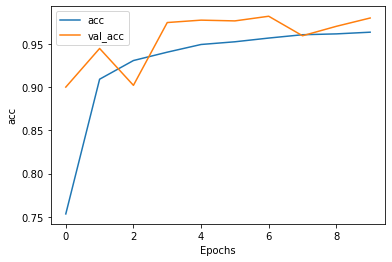

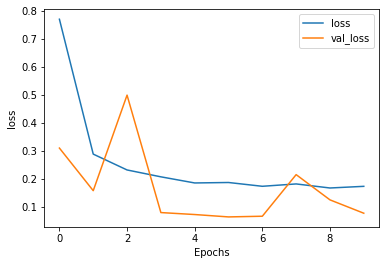

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [11]:
model.save("With 3 layers 32 by 32.h5")

 # With 4 layers using Batch Normalization

In [12]:
model1 = tf.keras.Sequential()
# First layers
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Second Layer
model1.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Third Layer
model1.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2,2))
# Flatten Layer
model1.add(tf.keras.layers.Flatten())
# HIdden Dense layer
model1.add(tf.keras.layers.Dense(256,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
# Output Layer
model1.add(tf.keras.layers.Dense(number_classes,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)        

In [13]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

callbacks = [earlystop, checkpoint]

history1 = model1.fit_generator(training_data,
    steps_per_epoch =  nb_train_samples // batch_size,
    epochs = 10,
#     callbacks = callbacks,
    validation_data = testing_data,
    validation_steps =  nb_validation_samples // batch_size,
callbacks=callbacks)

Epoch 1/10
1279/1279 [==============================] - ETA: 0s - loss: 0.6868 - acc: 0.7824
Epoch 00001: val_loss improved from inf to 0.38794, saving model to C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5
1279/1279 [==============================] - 94s 74ms/step - loss: 0.6868 - acc: 0.7824 - val_loss: 0.3879 - val_acc: 0.8775
Epoch 2/10
1279/1279 [==============================] - ETA: 0s - loss: 0.1984 - acc: 0.9342
Epoch 00002: val_loss improved from 0.38794 to 0.19805, saving model to C:/Users/Ganesh/Documents/tensorflow/Image Processing/models/best_cnn_model_batch_normalization.h5
1279/1279 [==============================] - 94s 73ms/step - loss: 0.1984 - acc: 0.9342 - val_loss: 0.1980 - val_acc: 0.9391
Epoch 3/10
1279/1279 [==============================] - ETA: 0s - loss: 0.1371 - acc: 0.9568
Epoch 00003: val_loss did not improve from 0.19805
1279/1279 [==============================] - 93s 73ms/step - loss: 0.1371 - acc: 0

In [14]:
model1.evaluate(testing_data)

430/430 [==============================] - 10s 23ms/step - loss: 0.1479 - acc: 0.9721


[0.1479005515575409, 0.9720727205276489]

In [15]:
model1.save("classify_fruit_model_loss.h5")

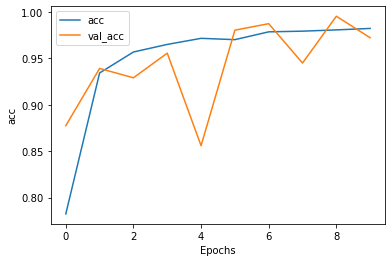

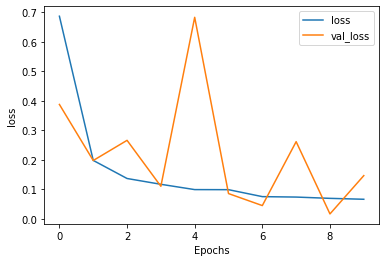

In [16]:
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")

# Printing classification report with first model i.e. 2 conv layers

In [10]:
first_model = tf.keras.models.load_model("../With 3 layers 32 by 32.h5")

In [14]:
p_test = first_model.predict_generator(testing_data,testing_step//batch_size,verbose=1,).argmax(axis=1)

430/430 [==============================] - 45s 104ms/step


In [15]:
from sklearn.metrics import classification_report
y_test = testing_data.classes
print(classification_report(y_test,p_test))


              precision    recall  f1-score   support

           0       0.88      0.81      0.84       164
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       143
           3       1.00      0.99      1.00       166
           4       1.00      0.47      0.64       150
           5       1.00      0.95      0.98       154
           6       1.00      1.00      1.00       166
           7       1.00      1.00      1.00       164
           8       0.99      1.00      1.00       166
           9       1.00      1.00      1.00       234
          10       1.00      1.00      1.00       164
          11       0.78      1.00      0.88       153
          12       1.00      1.00      1.00       166
          13       1.00      1.00      1.00       166
          14       1.00      1.00      1.00       166
          15       0.98      1.00      0.99       328
          16       1.00      1.00      1.00       166
          17       1.00    

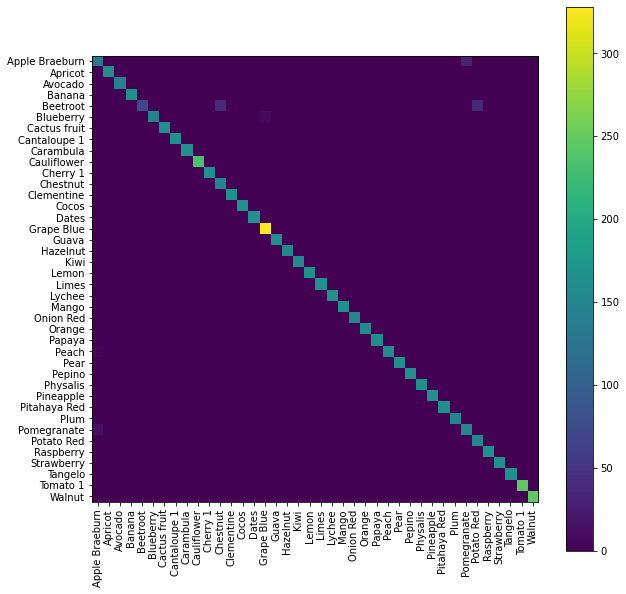

In [16]:
conf = confusion_matrix(y_test,p_test)
plt.figure(figsize=(10,10))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# Printing Classification values with second model i.e. Batch normaliztion

In [20]:
second_model = tf.keras.models.load_model("../classify_fruit_model_loss.h5")

In [21]:
pred_test = second_model.predict_generator(testing_data,testing_step//batch_size,verbose=1,).argmax(axis=1)

430/430 [==============================] - 50s 115ms/step


In [22]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       143
           3       0.95      0.81      0.87       166
           4       1.00      0.52      0.68       150
           5       1.00      1.00      1.00       154
           6       0.82      0.89      0.85       166
           7       1.00      1.00      1.00       164
           8       1.00      0.95      0.98       166
           9       1.00      1.00      1.00       234
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       153
          12       1.00      1.00      1.00       166
          13       1.00      1.00      1.00       166
          14       1.00      1.00      1.00       166
          15       1.00      1.00      1.00       328
          16       1.00      1.00      1.00       166
          17       1.00    

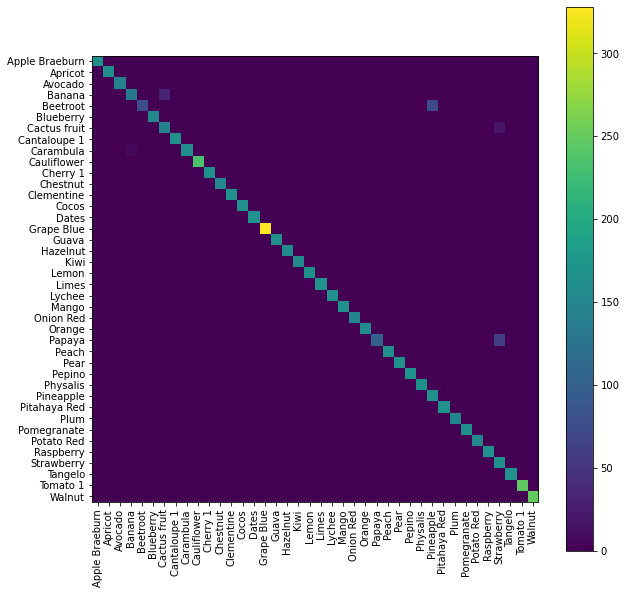

In [23]:
conf = confusion_matrix(y_test,pred_test)
plt.figure(figsize=(10,10))
plt.imshow(conf, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

#### By analyzing 2 models i found that the second one did performed well with the unseen data as we can see classification report
#### is slight better than first model

# Lets print unseen data

In [82]:
from keras.preprocessing import image
first_model= tf.keras.models.load_model('../With 3 layers 32 by 32.h5')
def predict_one_image(img, model):
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC)
    img = np.reshape(img, (1, 32, 32, 3))
    img = img/255.
    pred = model.predict(img)
    class_num = np.argmax(pred)
    return class_num, np.max(pred)

Limes 100%


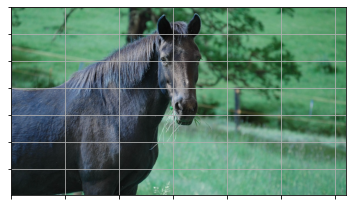

In [101]:
import cv2
datas=os.listdir("../fruits-360/Training")
test_img = cv2.imread('C:/Users/Ganesh/Documents/tensorflow/Image Processing/classify fruits/fruits-360/test-multiple_fruits/horse.jpg')
pred, probability = predict_one_image(test_img,first_model)
if probability > 0.5:
    print('%s %d%%' % (datas[pred], round(probability, 2) * 100))
    _, ax = plt.subplots(1)
    plt.imshow(test_img)
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid('off')
    plt.show()
else:
    print("This is not fruit photo.Please upload fruit photo")
    _, ax = plt.subplots(1)
    plt.imshow(test_img)
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid('off')
    plt.show()
    